# ANALYSIS OF COVID19 OUTBREAK

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [154]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [155]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,43,47,48,50,50,50,53,59,70,75
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,331,360,420,461,502,511,581,639,639,701
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,110,117,130,138,150,150,160,178,178,200
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,50,83,93,99,117,129,149,149,197


In [156]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,31,31,31,33,34,34,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,43,43,46,76,76,76,101,118,118,118
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,78,78,78,96,96,97
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,22,22,22,23,24,24,24,26,26,26


In [157]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,6,6,10,10,15,16,19
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Since the data is updated regularly and the most recent date is the last column of the dataset, the code below would help extract the most recent date

In [158]:
most_recent=confirmed_df.columns[-1]

# The code below creates pivot tables for the different datasets

In [159]:
conf1 = pd.pivot_table(confirmed_df, values=most_recent, index=['Country/Region'], aggfunc=np.sum)
recov1=pd.pivot_table(recoveries_df, values=most_recent, index=['Country/Region'], aggfunc=np.sum)
dead1=pd.pivot_table(deaths_df, values=most_recent, index=['Country/Region'], aggfunc=np.sum)


#The 3 Pivot tables were merged on the left with their corresponding indices (Country/Region) to form a single table.

In [160]:
mergedDf = conf1.merge(recov1[most_recent], left_index=True, right_index=True)

mergedDf = mergedDf.merge(dead1[most_recent], left_index=True, right_index=True)
mergedDf = mergedDf.drop(['Cruise Ship'],axis=0)

In [161]:
cases=mergedDf.iloc[:,0]
recovered=mergedDf.iloc[:,1]
dead=mergedDf.iloc[:,2]
mergedDf['recovery_rate']=recovered/cases
mergedDf['death_rate']=dead/cases
mergedDf['cases']=cases

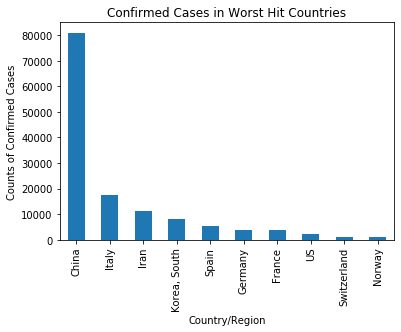

In [162]:
tab=mergedDf['cases'].sort_values(ascending=False).head(10)
tab.plot(kind='bar')
plt.ylabel("Counts of Confirmed Cases")
plt.title("Confirmed Cases in Worst Hit Countries")
ind=tab.index

Text(0.5, 1.0, 'Highest Recovery Rates in the World')

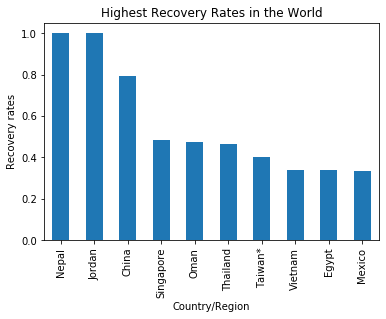

In [163]:
tab2=mergedDf['recovery_rate'].sort_values(ascending=False).head(10)
tab2.plot(kind='bar')
plt.ylabel("Recovery rates")
plt.title("Highest Recovery Rates in the World")

Text(0.5, 1.0, 'Recovery Rates in Worst Hit Countries')

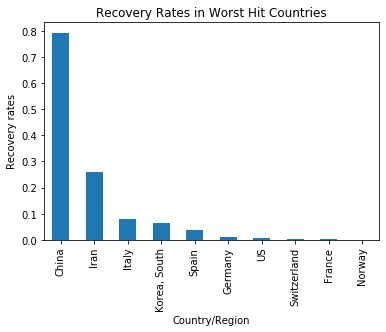

In [164]:
tab22=mergedDf['recovery_rate'].loc[ind].sort_values(ascending=False)
tab22.plot(kind='bar')
plt.ylabel("Recovery rates")
plt.title("Recovery Rates in Worst Hit Countries")

Text(0.5, 1.0, 'Highest Death Rates in the World')

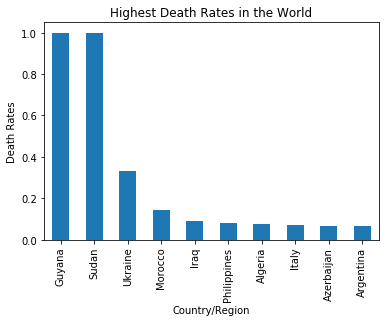

In [165]:
tab3=mergedDf['death_rate'].sort_values(ascending=False).head(10)
tab3.plot(kind='bar')
plt.ylabel("Death Rates")
plt.title("Highest Death Rates in the World")

Text(0.5, 1.0, 'Death Rates of Worst Hit Countries')

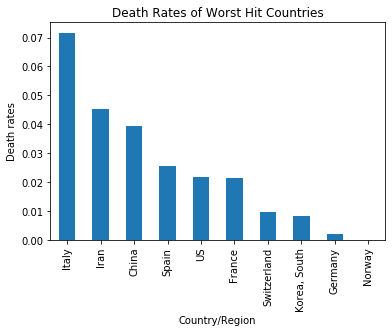

In [166]:
tab33=mergedDf['death_rate'].loc[ind].sort_values(ascending=False)
tab33.plot(kind='bar')
plt.ylabel("Death rates")
plt.title("Death Rates of Worst Hit Countries")

In [104]:
recov1=pd.pivot_table(recoveries_df, index=['Country/Region'], aggfunc=np.sum)

In [107]:
d=recov1.loc[['Italy'],'1/22/20':most_recent].transpose()
dd=pd.pivot_table(d,index=['Italy'], aggfunc=np.sum)

In [146]:
CC=confirmed_df.drop(['Lat','Long','Province/State'],axis=1).groupby('Country/Region').sum()
RR=recoveries_df.drop(['Lat','Long','Province/State'],axis=1).groupby('Country/Region').sum()
DD=deaths_df.drop(['Lat','Long','Province/State'],axis=1).groupby('Country/Region').sum()

In [120]:
ax1.plot(CC.loc['US'])

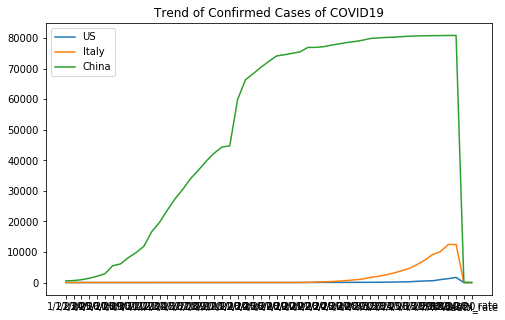

In [139]:
#plt.figure(figsize=(20,20))
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
#ax2 = fig.add_subplot(1, 1, 1)
#ax3 = fig.add_subplot(1, 1, 1)
#ax1.plot(dd)
#ax2.plot(CC.loc['Italy'])
ax.plot(CC.loc['US'],label='US')
ax.plot(CC.loc['Italy'],label='Italy')
ax.plot(CC.loc['China'],label='China')
plt.title('Trend of Confirmed Cases of COVID19')
ax.legend()

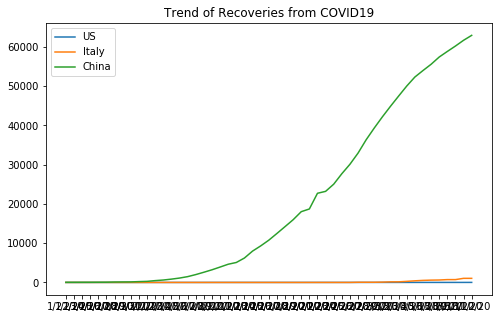

In [150]:
#plt.figure(figsize=(20,20))
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(RR.loc['US'],label='US')
ax.plot(RR.loc['Italy'],label='Italy')
ax.plot(RR.loc['China'],label='China')
plt.title('Trend of Recoveries from COVID19')
ax.legend()

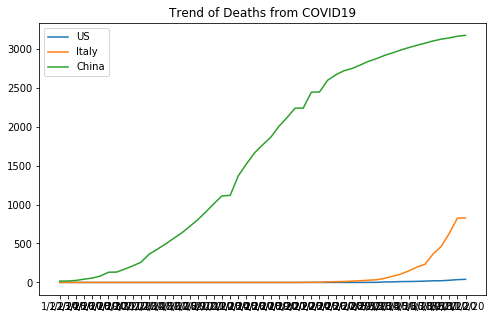

In [148]:
#plt.figure(figsize=(20,20))
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(DD.loc['US'],label='US')
ax.plot(DD.loc['Italy'],label='Italy')
ax.plot(DD.loc['China'],label='China')
plt.title('Trend of Deaths from COVID19')
ax.legend()